In [3]:
import pandas as pd

df_hex = pd.read_csv('hexcounted.csv')
df_hex.head()

,Unnamed: 0,left,bottom,right,top,geometry,count
0,0,-149.389382,-45.000021,-147.657331,-43.500020,MULTIPOLYGON (((-149.3893821528157 -44.2500206...,0
1,1,-149.389382,-43.500020,-147.657331,-42.000020,MULTIPOLYGON (((-149.3893821528157 -42.7500199...,0
2,2,-149.389382,-42.000020,-147.657331,-40.500019,MULTIPOLYGON (((-149.3893821528157 -41.2500192...,0
3,3,-149.389382,-40.500019,-147.657331,-39.000018,MULTIPOLYGON (((-149.3893821528157 -39.7500185...,0
4,4,-149.389382,-39.000018,-147.657331,-37.500017,MULTIPOLYGON (((-149.3893821528157 -38.2500178...,0


In [15]:
import geopandas as gpd
from shapely import wkt

crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df_hex, crs=crs)
#convert string representation of geometry to geometry objects
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
gdf.head()

,Unnamed: 0,left,bottom,right,top,geometry,count
0,0,-149.389382,-45.000021,-147.657331,-43.500020,(POLYGON ((-149.3893821528157 -44.250020631576...,0
1,1,-149.389382,-43.500020,-147.657331,-42.000020,(POLYGON ((-149.3893821528157 -42.750019932201...,0
2,2,-149.389382,-42.000020,-147.657331,-40.500019,(POLYGON ((-149.3893821528157 -41.250019232825...,0
3,3,-149.389382,-40.500019,-147.657331,-39.000018,(POLYGON ((-149.3893821528157 -39.750018533450...,0
4,4,-149.389382,-39.000018,-147.657331,-37.500017,(POLYGON ((-149.3893821528157 -38.250017834074...,0


In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]

In [17]:
hexbin_in_map = gpd.sjoin(gdf, world, how="inner", op='intersects')
hexbin_in_map.head()

,Unnamed: 0,left,bottom,right,top,geometry,count,index_right,pop_est,continent,name,iso_a3,gdp_md_est
69,69,-149.389382,58.500027,-147.657331,60.000028,(POLYGON ((-149.3893821528157 59.2500276253318...,30,168,313973000.0,North America,United States,USA,15094000.0
70,70,-149.389382,60.000028,-147.657331,61.500029,(POLYGON ((-149.3893821528157 60.7500283247073...,30,168,313973000.0,North America,United States,USA,15094000.0
71,71,-149.389382,61.500029,-147.657331,63.000029,(POLYGON ((-149.3893821528157 62.2500290240828...,30,168,313973000.0,North America,United States,USA,15094000.0
72,72,-149.389382,63.000029,-147.657331,64.500030,(POLYGON ((-149.3893821528157 63.7500297234583...,30,168,313973000.0,North America,United States,USA,15094000.0
73,73,-149.389382,64.500030,-147.657331,66.000031,(POLYGON ((-149.3893821528157 65.2500304228338...,30,168,313973000.0,North America,United States,USA,15094000.0


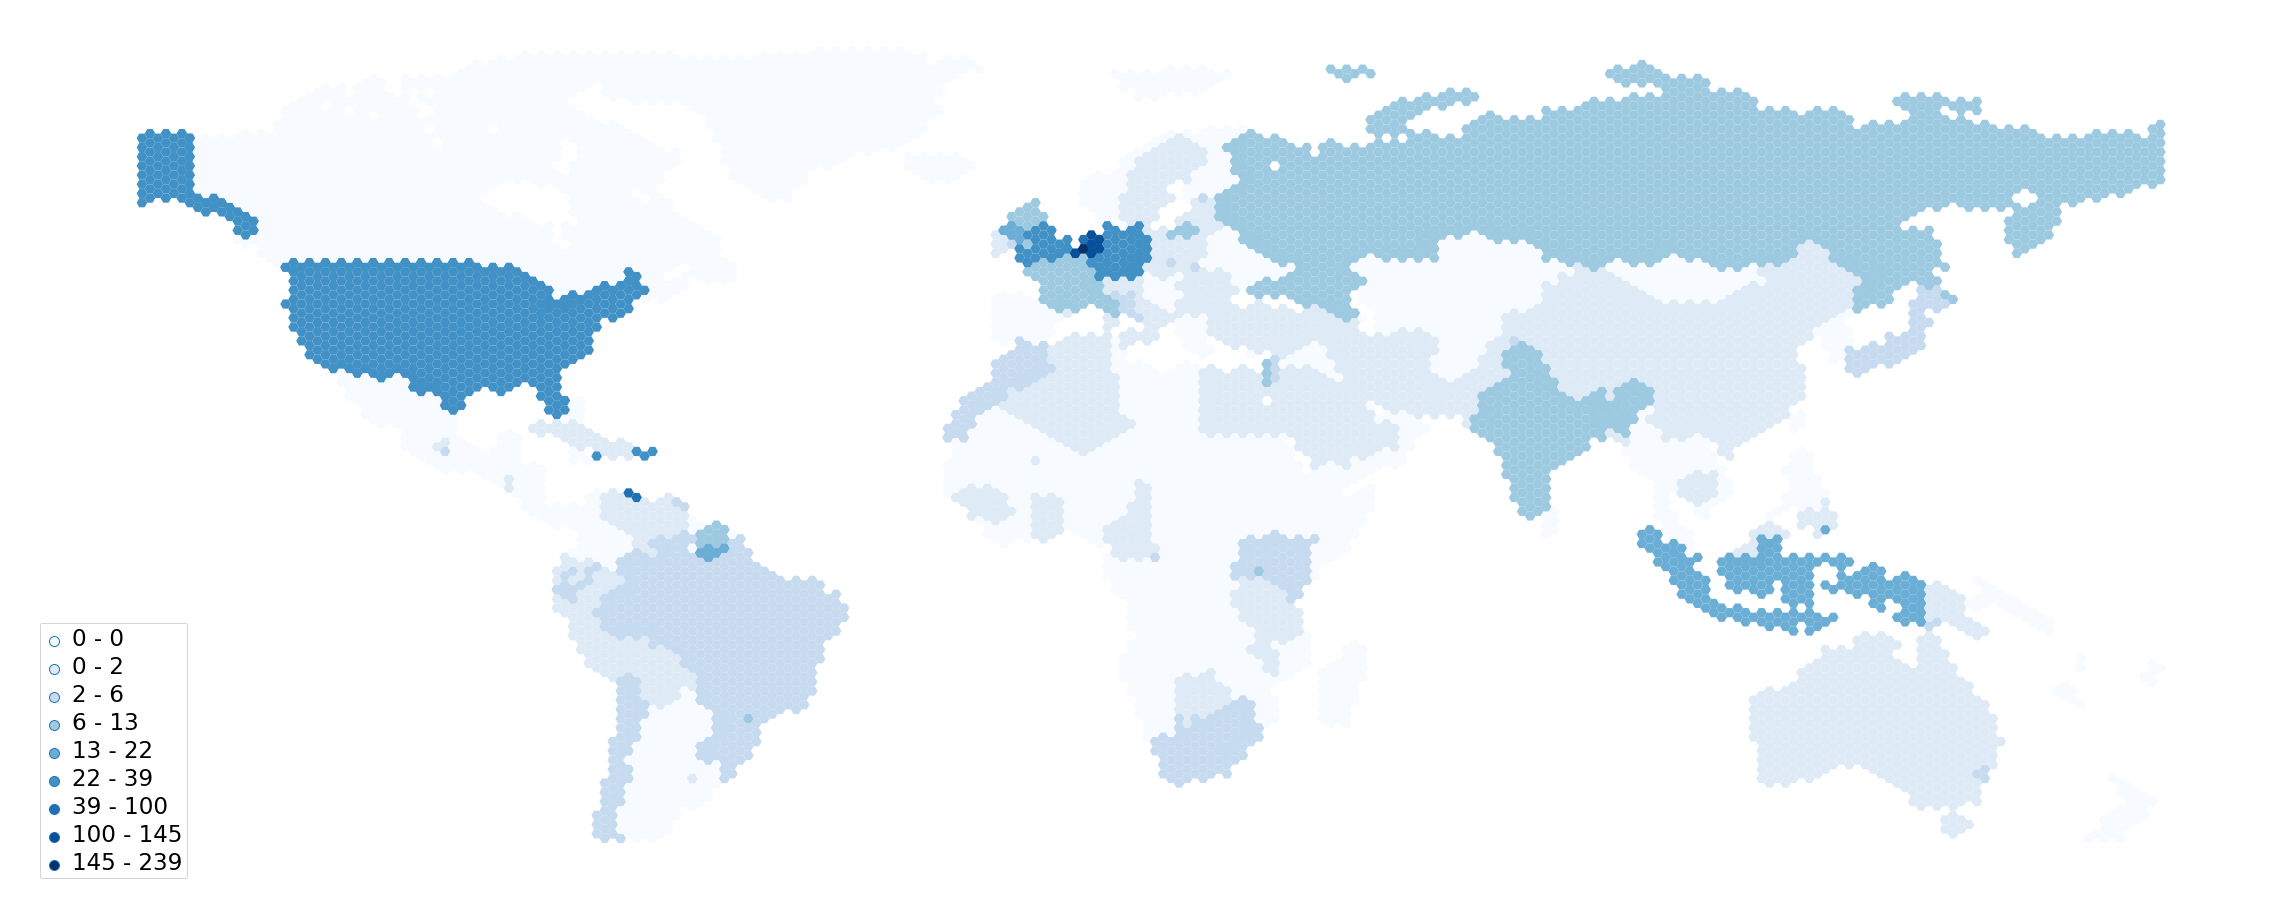

In [21]:
%matplotlib inline

import matplotlib.pylab as plt

ax = hexbin_in_map.plot(column='count', cmap='Blues', scheme='fisher_jenks', k=9, legend=True, legend_kwds={'loc':'lower left'}, figsize=(40,40))
leg = ax.get_legend()

# turn legend floats to int
for i in leg.get_texts():
    i.set_text(i.get_text().replace(".00", ""))

plt.setp(ax.get_legend().get_texts(), fontsize='23')

ax.axis('off')
plt.show()

In [22]:
ax.get_figure().savefig('hexbin_map.svg')
ax.get_figure().savefig('hexbin_map.png')